## Target Testing

This Notobook intends to study the distribution of the target, assessing its pertinence and its capacity to accurately describe the financial trend. We will use different target parameters, such as the period, the goalreturn and the option logreturn in order to find which parameters most successfully describe the financial trend. 

Lastly, the best parameters will be defined as the default parameters of the method add_target 





In [2]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [3]:
from src.data_loader import load_data

spy = load_data()
spy.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2000-01-03 00:00:00-05:00,93.388783,93.388783,90.632790,91.617073,8164300,0.0,0.0,0.0
1,2000-01-04 00:00:00-05:00,90.416197,90.750853,87.965333,88.034233,8089800,0.0,0.0,0.0
2,2000-01-05 00:00:00-05:00,88.152340,89.156308,86.459374,88.191711,12177900,0.0,0.0,0.0
3,2000-01-06 00:00:00-05:00,87.955531,89.136670,86.774391,86.774391,6227200,0.0,0.0,0.0
4,2000-01-07 00:00:00-05:00,88.388629,91.813934,88.231144,91.813934,8066500,0.0,0.0,0.0


In [4]:
from src.features import add_MA, add_EMA, add_returns, add_volatility, add_distances, add_cumulated_returns, add_rsi, add_target, add_all_features

df1 = spy.copy()
df1 = add_all_features(df1)
df1 = add_target(df1)

In [5]:
df1 = df1.drop(['Dividends', 'Stock Splits', 'Capital Gains'], axis=1)
df1.head()


,Date,Open,High,Low,Close,Volume,MA10,MA50,EMA20,Return,Log Return,Volatility,Distance_MA50,Distance_EMA20,Cumulated_Return_5d,RSI14,Trend
0,2000-01-03 00:00:00-05:00,93.388783,93.388783,90.632790,91.617073,8164300,NaN,NaN,91.617073,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,Non-Bullish
1,2000-01-04 00:00:00-05:00,90.416197,90.750853,87.965333,88.034233,8089800,NaN,NaN,89.736082,-0.039107,-0.039892,NaN,NaN,-0.018965,NaN,NaN,Bullish
2,2000-01-05 00:00:00-05:00,88.152340,89.156308,86.459374,88.191711,12177900,NaN,NaN,89.168998,0.001789,0.001787,NaN,NaN,-0.010960,NaN,NaN,Bullish
3,2000-01-06 00:00:00-05:00,87.955531,89.136670,86.774391,86.774391,6227200,NaN,NaN,88.477712,-0.016071,-0.016201,NaN,NaN,-0.019251,NaN,NaN,Bullish
4,2000-01-07 00:00:00-05:00,88.388629,91.813934,88.231144,91.813934,8066500,NaN,NaN,89.284716,0.058076,0.056453,NaN,NaN,0.028328,NaN,NaN,Non-Bullish


In [6]:
df1['Trend'].value_counts(normalize=True)

Trend
Non-Bullish    0.636609
Bullish        0.363391
Name: proportion, dtype: float64

In [7]:
dates = df1['Date'].astype(str).apply(lambda x: x[:4])
dates

date_trend_df = pd.DataFrame([dates, df1['Trend']]).T
date_trend_df['Trend'] = date_trend_df['Trend'].apply(lambda x: 1 if x == "Bullish" else 0)

infos = date_trend_df.groupby(['Date']).mean()
infos

,Trend
Date,
2000,0.119048
2001,0.193548
2002,0.115079
2003,0.678571
2004,0.222222
2005,0.186508
2006,0.390438
2007,0.183267
2008,0.059289


In [8]:
# Test on the functionning of the definition on other tickers

qqq = load_data(ticker = 'QQQ')
dow = load_data(ticker = 'DIA')

qqq = add_target(qqq)
dow = add_target(dow)
print(qqq['Trend'].value_counts(normalize=True))
print(dow['Trend'].value_counts(normalize=True))

Trend
Non-Bullish    0.557252
Bullish        0.442748
Name: proportion, dtype: float64
Trend
Non-Bullish    0.654739
Bullish        0.345261
Name: proportion, dtype: float64


Similar to the Dow Jones, less aggressive than the Nasdaq, the target seems coherent, now we will test if it is sensitive to a little gaussian noise on the price

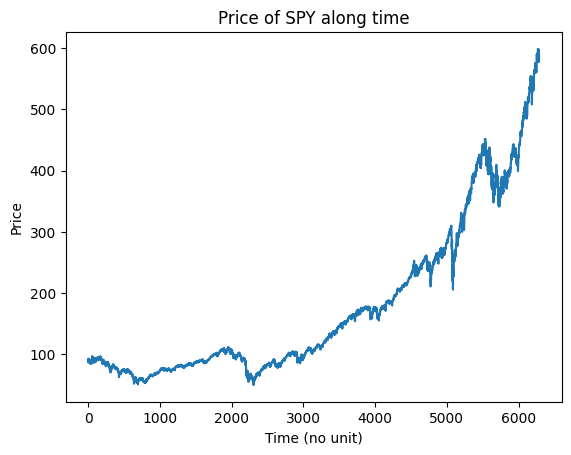

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Price of SPY along time')
plt.xlabel('Time (no unit)')
plt.ylabel('Price')
plt.plot(df1['Close'])


#Add gaussian noise

def add_gaussian(df: pd.DataFrame, mu = 0, sigma = 0.1):

    df1 = df.copy()

    rng = np.random.default_rng()
    s = rng.normal(mu, sigma, df1['Close'].size)
    df1['Close'] = df1['Close'] + s

    return df1['Close']

gaussian_prices = add_gaussian(df1)

fig, axes = plt.subplots(1, 2)
axes[0]

